In [20]:
!pip install -q tensorflow
!pip install -q keras

In [2]:
!pip install -q --upgrade tensorflow

1/1 [==============================] - 1s 567ms/step


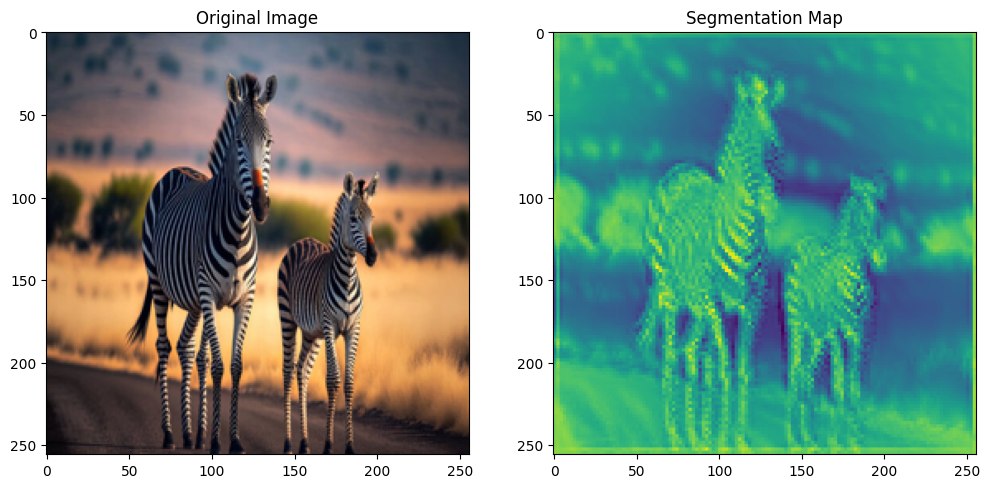

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from PIL import Image
import matplotlib.pyplot as plt

# Define the U-Net model
def unet_model(input_size=(256, 256, 3)):
    inputs = tf.keras.Input(input_size)

    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D()(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    up1 = layers.UpSampling2D()(conv2)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(up1)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Load and preprocess the image for segmentation
image_path = '/content/img2.jpg'  # Replace with the path to your image
img = Image.open(image_path).resize((256, 256))  # Resize for consistency
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0  # Normalize to [0, 1]

# Create and compile the U-Net model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Get the segmentation map
predictions = model.predict(img_array)

# Display the original image and the segmentation map
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predictions[0, :, :, 0], cmap='viridis')  # Display the output channel
plt.title('Segmentation Map')

plt.show()
